# Dataset Overview

This dataset has been taken from kaggle and our aim is to predict what sorts of people are likely to have a heart disease.

1. age
2. sex(1-male 0-female)
3. cp( Chest pain) | 0: asymptotic, 1: atypical angina, 2: non-anginal pain, 3: typical angina
4. trestbps(resting blood pressure | (in mm Hg on admission to the hospital))
5. chol(serum cholestoral in mg/dl)
6. fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg(resting electrocardiographic results | 0: showing probable or definite left ventricular hypertrophy by Estes' criteria , 1: normal, 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. thalach(maximum heart rate achieved)
9. exang(exercise induced angina (1 = yes; 0 = no))
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment(0: downsloping; 1: flat; 2: upsloping)
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: | 1 = fixed defect; 2 = normal; 3 = reversable defect
14. target (yes = 1(>50% chance of having the disease), no=0(<50% chance of having disease))

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heart1.csv')
data.head()
#reading top-5 rows from our dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,0


In [3]:
print("Dimensions")
print("No of rows",data.shape[0])
print("No of columns",data.shape[1])

Dimensions
No of rows 303
No of columns 14


In [4]:
data.isna().sum()
#some missing values in dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

## Categorical Variables in the Dataset
> sex, cp, fbs, restecg, exang, slope, thal

## Numeric Variables in Dataset
> age, trestbps, chol, thalach, oldpeak, ca

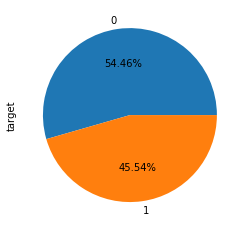

In [5]:
data.target.value_counts().plot.pie(autopct="%0.2f%%")

*Fairly balanced dataset 

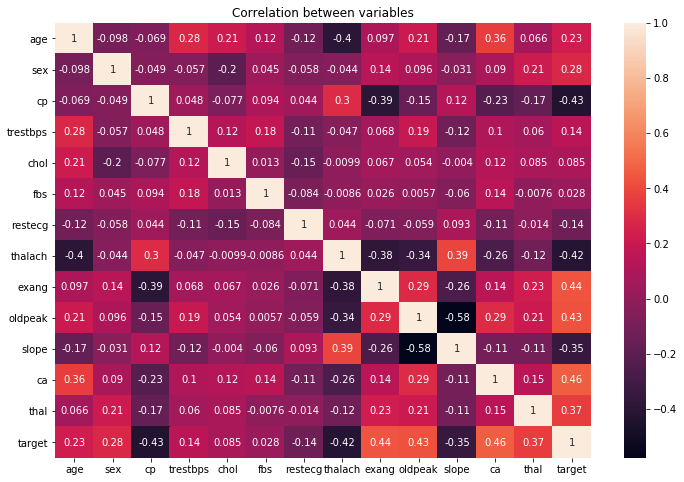

In [6]:
plt.figure(figsize=(12,8))
plt.title('Correlation between variables')
sns.heatmap(data.corr(),annot=True)

## Observations
> 1. Target variable is positively correlated to exang, oldpeak, ca, thal and negatively correlated to cp, thalach, slope.Age and Gender are slighly positively correlated to the target variable.
2. Age is highly negatively correlated with thalach(max heart rate)
3. Chest pain type is also negatively correlated with exang.
4. Chol is positively correlated with age.
5. Thalach is negatively correlated with exang, oldpeak.
6. Slope is highly negatively correlated to oldpeak and positively correlated to thalach. 

# Filling missing data

In [7]:
camode=data.ca.mode()
thalmode=data.thal.mode()
print(camode)
print(thalmode)

0    0.0
dtype: float64
0    2.0
dtype: float64


In [8]:
data.ca.fillna(0,inplace=True)
data.thal.fillna(2,inplace=True)

In [9]:
data.isna().sum()
#no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualising relation of variables with target variable.

### Age

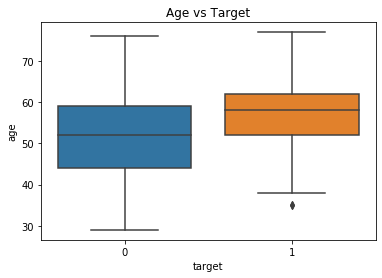

In [10]:
plt.title('Age vs Target')
sns.boxplot(x='target',y='age',data=data)

With only a few outliers, people with heart disease are relatively older.

### Gender

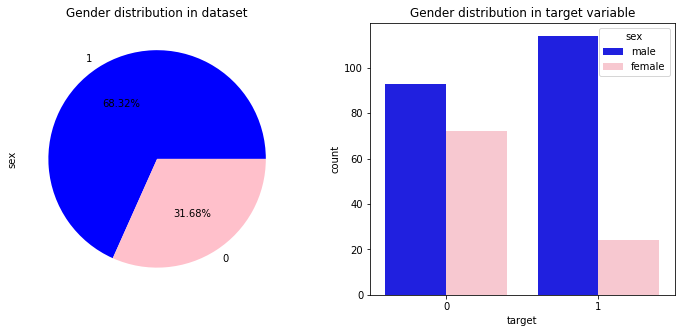

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Gender distribution in dataset')
data.sex.value_counts().plot.pie(autopct="%0.2f%%",colors=['blue','pink'])
df=data.iloc[:,[1,13]]
plt.subplot(122)
df['sex'].replace({1:'male',0:'female'},inplace=True)
plt.title('Gender distribution in target variable')
sns.countplot(x='target',data=df,hue='sex',palette=['blue','pink'])

We observe that more males have the disease than female.
At first,sex seems to be a good predictor as we see that from all those who have the heart disease,around 80% of them are males. Considering the fact that in our dataset higher number of males are there and so the results could be a bias because of more number. 

### Chest pain type

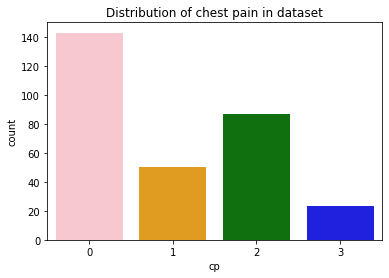

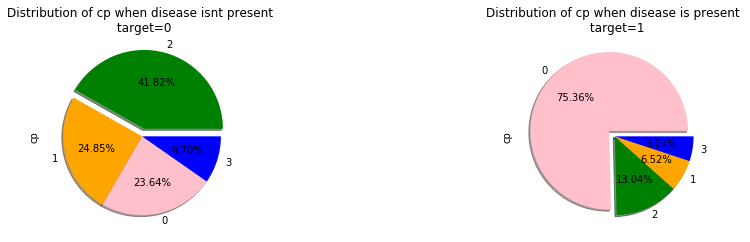

In [12]:
plt.title('Distribution of chest pain in dataset')
sns.countplot(x='cp',data=data,palette=['pink','orange','green','blue'])
plt.figure(figsize=(12,8))
df=data.groupby(['target'])['cp'].value_counts()
plt.subplot(131)
explode=(0.1,0,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['green','orange','pink','blue'],explode=explode,shadow=True)
plt.title("Distribution of cp when disease isnt present \n target=0")
plt.subplot(133)
plt.title("Distribution of cp when disease is present \n target=1")
explode=(0.1,0,0,0)
df[1].plot.pie(autopct="%0.2f%%",colors=['pink','green','orange','blue'],explode=explode,shadow=True)

ChestPain(cp) type seems to be really good predictor as people with pain type 0(Asymptotic) are at risk while people with type 2(non anginal type)  are quite on the safer side.

### trestbps

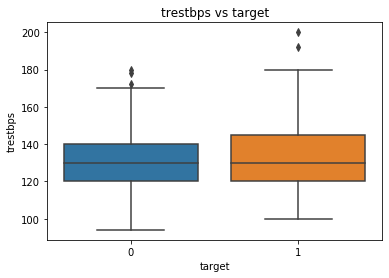

In [13]:
plt.title('trestbps vs target')
sns.boxplot(x='target',y='trestbps',data=data)


With a very few outliers, we see that trestbps doesnt vary much with the target.

### Chol(serum cholestrol in blood)

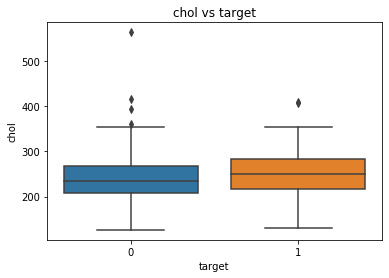

In [14]:
plt.title('chol vs target')
sns.boxplot(x='target',y='chol',data=data)


Chol doesnt vary much with the target.i.e serum cholestrol level isnt a clear indication of heart disease. We also also observe that few people having cholestrol level >350 are safe while one having chol level around 350 is at risk.(These are the outliers)

### restecg

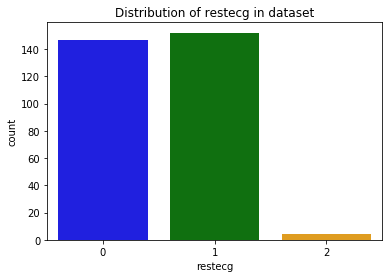

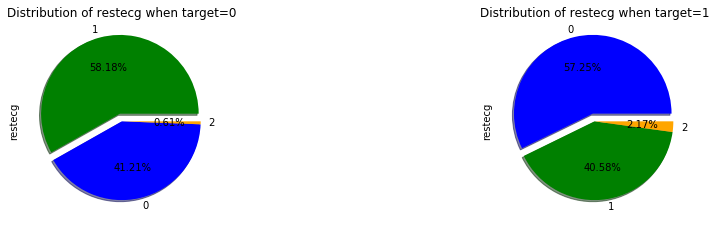

In [15]:
plt.title('Distribution of restecg in dataset')
sns.countplot(x='restecg',data=data,palette=['blue','green','orange'])
plt.figure(figsize=(12,8))
df=data.groupby(['target'])['restecg'].value_counts()
plt.subplot(131)
explode=(0.1,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['green','blue','orange'],explode=explode,shadow=True)
plt.title("Distribution of restecg when target=0")
plt.subplot(133)
plt.title("Distribution of restecg when target=1")
df[1].plot.pie(autopct="%0.2f%%",colors=['blue','green','orange'],explode=explode,shadow=True)


restecg seems to be a fairly good predictor as people with type 0 and type 1 have 60%-40% chance of being under risk.

### Thalach (maximum heart rate)

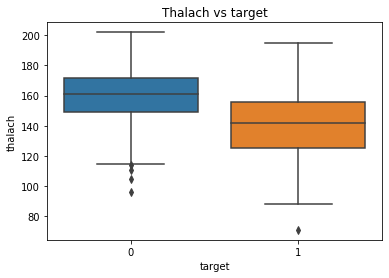

In [16]:
plt.title("Thalach vs target")
sns.boxplot(x='target',y='thalach',data=data)

People with heart disease have relatively lower heart rate. Hence thalach is a good feature to work on.

### (exang) exercise induced angina

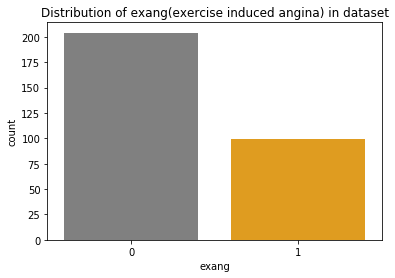

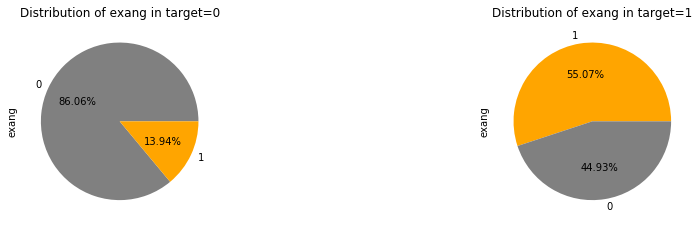

In [17]:
plt.title('Distribution of exang(exercise induced angina) in dataset')
sns.countplot(x='exang',data=data,palette=['grey','orange'])
df=data.groupby(['target'])['exang'].value_counts()
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('Distribution of exang in target=0')
df[0].plot.pie(autopct="%0.2f%%",colors=['grey','orange'])
plt.subplot(133)
plt.title('Distribution of exang in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['orange','grey'])

1. Mostly people in our dataset dont have exercise induced angina.
2. (exang) exercise induced angina seemed to increase the risk of heart disease with 55% of those who are at risk suffer from exercise induced angina and 86% of diseases free people dont suffer from exercise induced angina.

### fbs(fasting blood sugar levels)

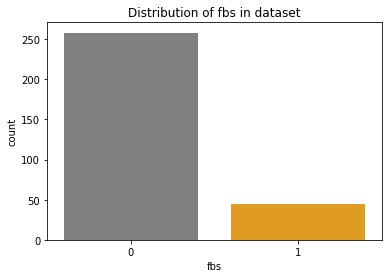

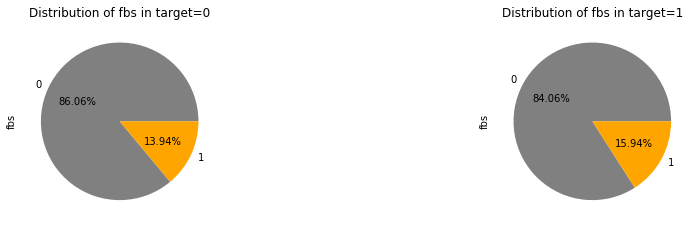

In [18]:
plt.title('Distribution of fbs in dataset')
sns.countplot(x='fbs',data=data,palette=['grey','orange'])
df=data.groupby(['target'])['fbs'].value_counts()
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('Distribution of fbs in target=0')
df[0].plot.pie(autopct="%0.2f%%",colors=['grey','orange'])
plt.subplot(133)
plt.title('Distribution of fbs in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['grey','orange'])

fbs isnt a great predictor as the distribution across target variable is nearly same.

### oldpeak

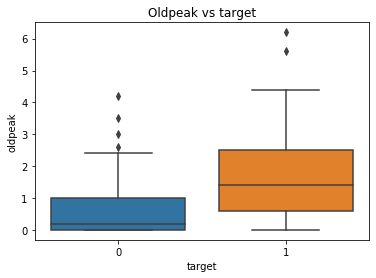

In [19]:
plt.title('Oldpeak vs target')
sns.boxplot(x='target',y='oldpeak',data=data)

People with heart diseases have relatively higher oldpeak value than those not having heart disease. Also a good feature.

### slope

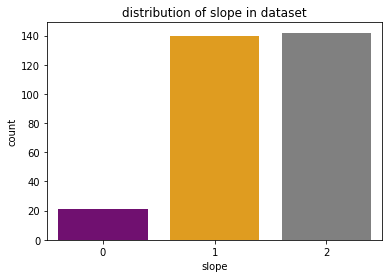

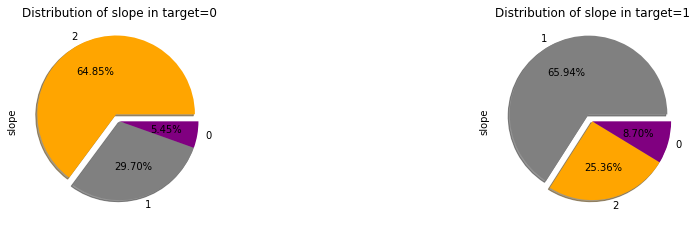

In [20]:
plt.title('distribution of slope in dataset')
sns.countplot(x='slope',data=data,palette=['purple','orange','grey'])
df=data.groupby(['target'])['slope'].value_counts()
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('Distribution of slope in target=0')
explode=(0.1,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['orange','grey','purple'],explode=explode,shadow=True)
plt.subplot(133)
plt.title('Distribution of slope in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['grey','orange','purple'],explode=explode,shadow=True)

66% of people who dont have the diseases belong to class 2 while 65% people having the diseases belong to class 1.Hence, slope seems to be a fairly good predictor.

### ca (number of major vessels colored by fluoroscopy)

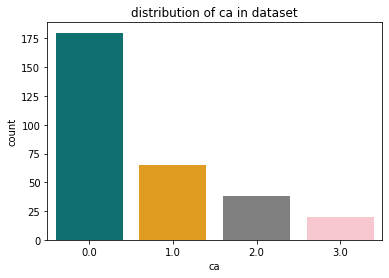

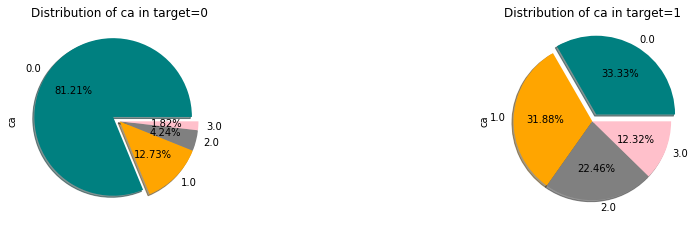

In [21]:
plt.title('distribution of ca in dataset')
sns.countplot(x='ca',data=data,palette=['teal','orange','grey','pink'])
df=data.groupby(['target'])['ca'].value_counts()
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('Distribution of ca in target=0')
explode=(0.1,0,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['teal','orange','grey','pink'],explode=explode,shadow=True)
plt.subplot(133)
plt.title('Distribution of ca in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['teal','orange','grey','pink'],explode=explode,shadow=True)

people with no colored vessels have 80% chance of being safe while rest other have a farly good chance of being under risk. ca is also a good predictor to work on.

### thal

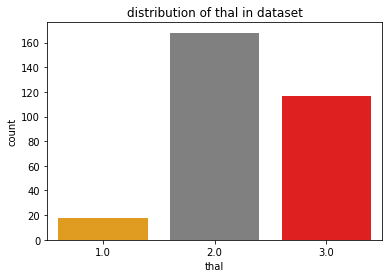

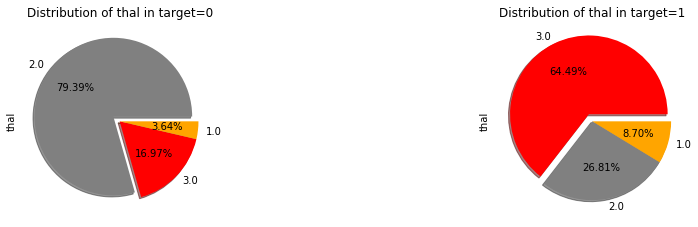

In [22]:
plt.title('distribution of thal in dataset')
sns.countplot(x='thal',data=data,palette=['orange','grey','red'])
df=data.groupby(['target'])['thal'].value_counts()
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('Distribution of thal in target=0')
explode=(0.1,0,0)
df[0].plot.pie(autopct="%0.2f%%",colors=['grey','red','orange'],explode=explode,shadow=True)
plt.subplot(133)
plt.title('Distribution of thal in target=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['red','grey','orange'],explode=explode,shadow=True)

thal also could also be a good predictor as people having a normal thal are safer than people who have a reversable defect.

## Visualising relation of predictor variables with each other

### thalach vs age

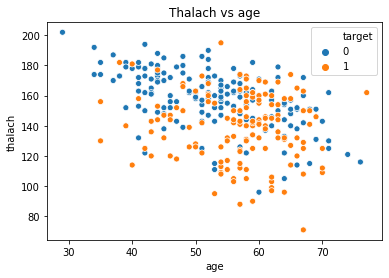

In [23]:
plt.title('Thalach vs age')
sns.scatterplot(x='age',y='thalach',hue='target',data=data)

We observe that as age increases maximum heart rate decreses and risk of getting the heart disease also increases.

### chestpain vs exang

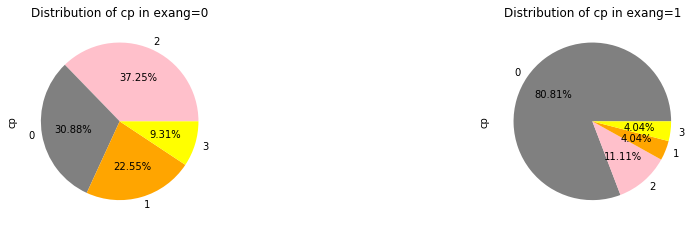

In [24]:
df=data.groupby(['exang'])['cp'].value_counts()
plt.figure(figsize=(12,8))
plt.subplot(131)
plt.title('Distribution of cp in exang=0')
df[0].plot.pie(autopct="%0.2f%%",colors=['pink','grey','orange','yellow'])
plt.subplot(133)
plt.title('Distribution of cp in exang=1')
df[1].plot.pie(autopct="%0.2f%%",colors=['grey','pink','orange','yellow'])

We observe that 80% of people who have exercise induced angina belong have asymptotic chest pain. We can infer that most of the times exercise induced angina takes the shape of asymptotic pain.

### chol vs age

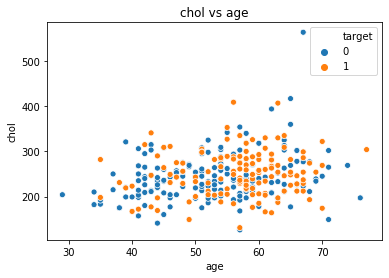

In [25]:
plt.title('chol vs age')
sns.scatterplot(x='age',y='chol',hue='target',data=data)

We observe that as age increases, chol increases and so does the risk of getting heart disease. We can say that older people with higher levels of cholestrol level are at a greater risk.

### thalach vs oldpeak

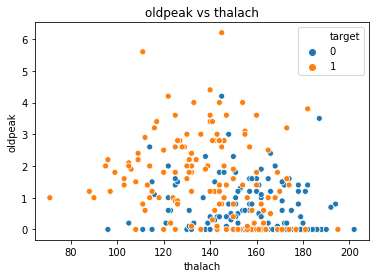

In [26]:
plt.title('oldpeak vs thalach')
sns.scatterplot(x='thalach',y='oldpeak',hue='target',data=data)

We observe that as thalach increases, oldpeak attains a lower value. People with lower heart rate and higher oldpeak value have a greater risk of getting heart disease.

### thalach vs exang

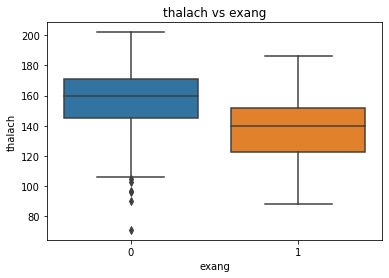

In [27]:
plt.title('thalach vs exang')
sns.boxplot(x='exang',y='thalach',data=data)

We see that people who have exercise induced angina have lower heart rate.

### thalach vs slope

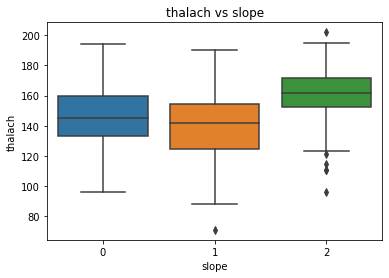

In [28]:
plt.title('thalach vs slope')
sns.boxplot(x='slope',y='thalach',data=data)

We observe that people who have a downsloping peak exercise ST segment have maximum heart rate while those with a flat and upsloping type have lower heart rate.  

### oldpeak vs slope

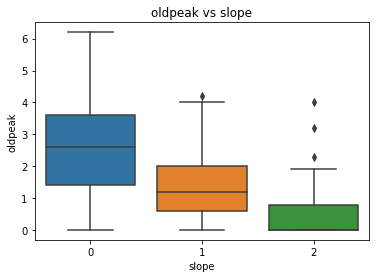

In [29]:
plt.title('oldpeak vs slope')
sns.boxplot(x='slope',y='oldpeak',data=data)

We observe that people who have a downsloping peak exercise ST segment have minimum oldpeak value while those with  upsloping type have maximum oldpeak value.

# Conclusion

> Chestpain(cp),exercise induced angina(exang),resting ecg(restecg) ,thal,thalach,slope,ca,oldpeak are good features. 
